In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Function to calculate joint positions based on angles
def calculate_joint_positions(shoulder_length, ankle_length, shoulder_roll, shoulder_pitch, ankle_pitch):
    shoulder_x = 0
    shoulder_y = 0
    shoulder_z = 0
    
    elbow_x = shoulder_length * np.cos(shoulder_pitch) * np.cos(shoulder_roll)
    elbow_y = shoulder_length * np.cos(shoulder_pitch) * np.sin(shoulder_roll)
    elbow_z = shoulder_length * np.sin(shoulder_pitch)
    
    end_effector_x = elbow_x + ankle_length * np.cos(ankle_pitch) * np.cos(shoulder_roll)
    end_effector_y = elbow_y + ankle_length * np.cos(ankle_pitch) * np.sin(shoulder_roll)
    end_effector_z = elbow_z + ankle_length * np.sin(ankle_pitch)
    
    return shoulder_x, shoulder_y, shoulder_z, elbow_x, elbow_y, elbow_z, end_effector_x, end_effector_y, end_effector_z


# Parameters
shoulder_length = 10.0
ankle_length = 7.0


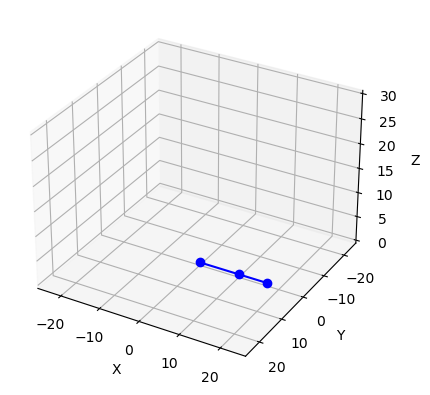

In [5]:

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Simulation loop
for shoulder_roll_angle in np.linspace(0, np.pi, 100):
    shoulder_pitch_angle = np.sin(shoulder_roll_angle)  # Example relationship between roll and pitch
    ankle_pitch_angle = np.sin(shoulder_roll_angle)  # Example relationship between roll and pitch
    
    # Calculate joint positions
    shoulder_x, shoulder_y, shoulder_z, elbow_x, elbow_y, elbow_z, end_effector_x, end_effector_y, end_effector_z = calculate_joint_positions(
        shoulder_length, ankle_length, shoulder_roll_angle, shoulder_pitch_angle, ankle_pitch_angle
    )
    
    # Plot the stick-and-ball diagram
    ax.cla()
    ax.set_xlim(-25, 25)
    ax.set_ylim(25, -25)
    ax.set_zlim(0, 30)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Draw the robotic arm
    ax.plot([shoulder_x, elbow_x, end_effector_x], [shoulder_y, elbow_y, end_effector_y], [shoulder_z, elbow_z, end_effector_z], marker='o', color='b')
    
    plt.pause(0.01)

plt.show()